## Importing the Packages

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00


In [5]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.7 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data

In [8]:
# Importar la biblioteca yfinance para descargar datos financieros
import yfinance as yf

# Descargar datos de los tickers especificados
raw_data = yf.download(tickers="VOW3.DE PAH3.DE BMW.DE", interval="1d", group_by='ticker', auto_adjust=True, threads=True)


[*********************100%%**********************]  3 of 3 completed


In [9]:
df = raw_data.copy()

## Defining Key Dates

In [10]:
# Starting Date
start_date = "2009-04-05"

# First Official Announcement - 49.9%
ann_1 = "2009-12-09"

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05"

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20'

## Pre-processing the Data

In [11]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [12]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [13]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

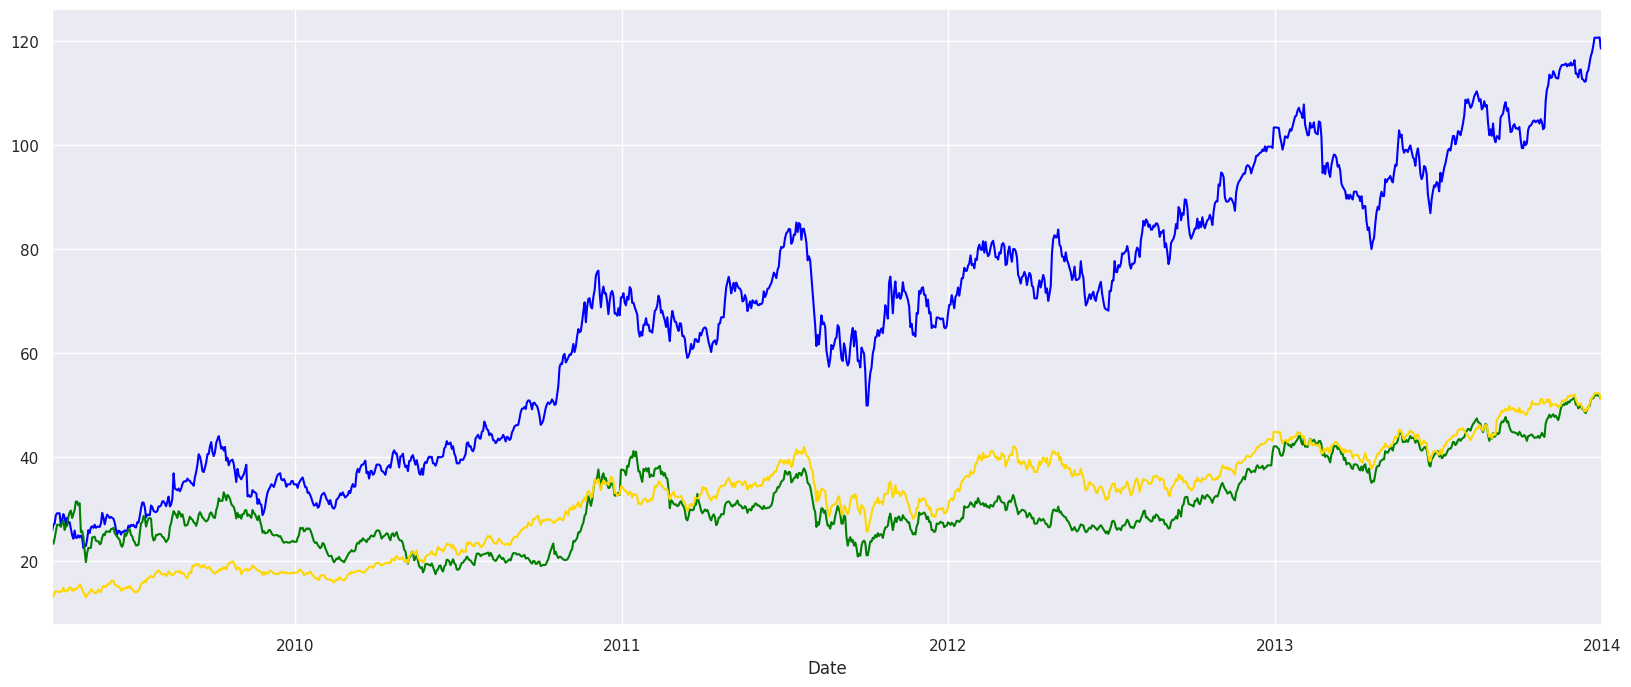

In [14]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

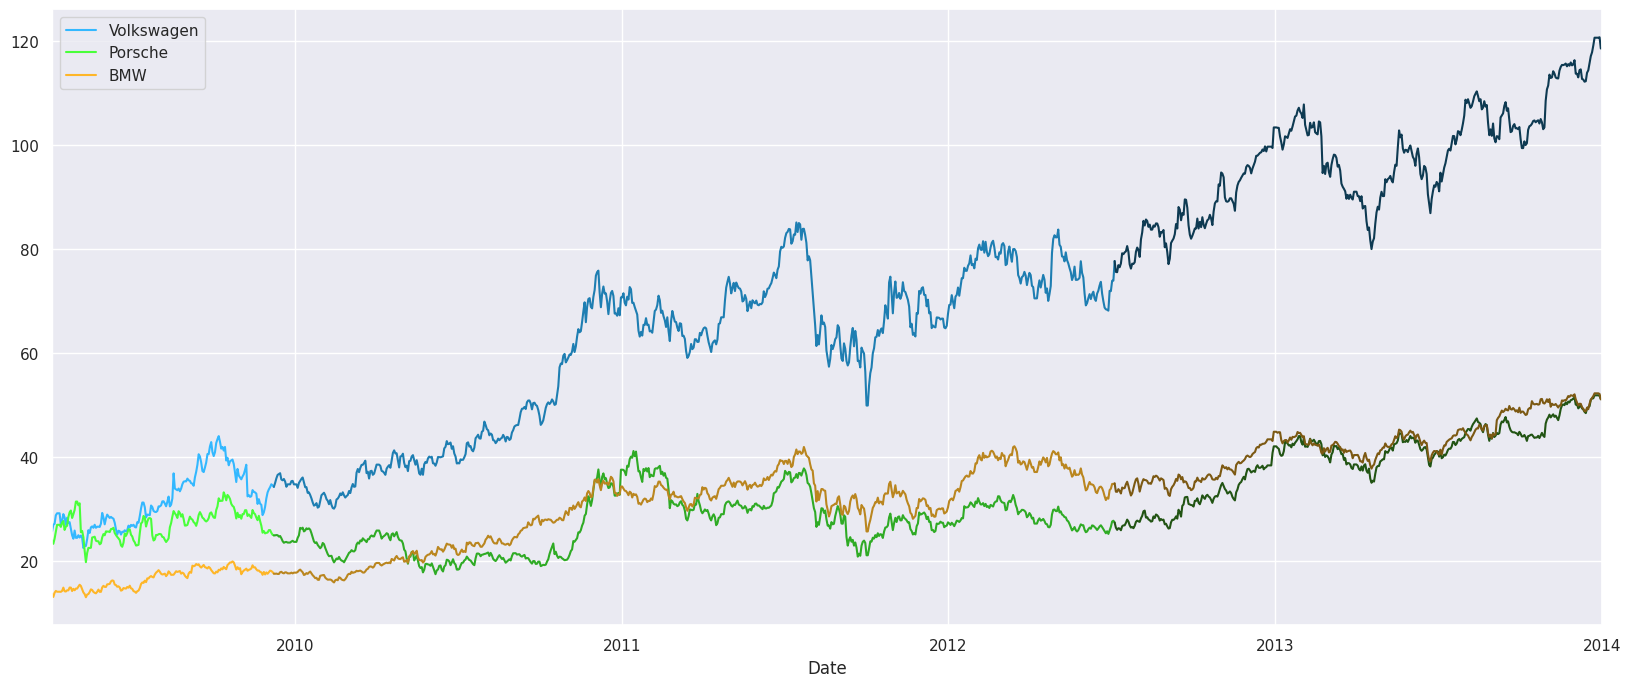

In [16]:
# Plot de la columna 'vol' desde start_date hasta ann_1 con un color específico.
df['vol'][start_date:ann_1].plot(figsize=(20, 8), color="#33B8FF")

# Plot de la columna 'por' desde start_date hasta ann_1 con un color específico.
df['por'][start_date:ann_1].plot(color="#49FF3A")

# Plot de la columna 'bmw' desde start_date hasta ann_1 con un color específico.
df['bmw'][start_date:ann_1].plot(color="#FEB628")

# Plot de la columna 'vol' desde ann_1 hasta ann_2 con un color específico.
df['vol'][ann_1:ann_2].plot(color="#1E7EB2")

# Plot de la columna 'por' desde ann_1 hasta ann_2 con un color específico.
df['por'][ann_1:ann_2].plot(color="#2FAB25")

# Plot de la columna 'bmw' desde ann_1 hasta ann_2 con un color específico.
df['bmw'][ann_1:ann_2].plot(color="#BA861F")

# Plot de la columna 'vol' desde ann_2 hasta end_date con un color específico.
df['vol'][ann_2:end_date].plot(color="#0E3A52")

# Plot de la columna 'por' desde ann_2 hasta end_date con un color específico.
df['por'][ann_2:end_date].plot(color="#225414")

# Plot de la columna 'bmw' desde ann_2 hasta end_date con un color específico.
df['bmw'][ann_2:end_date].plot(color="#7C5913")

# Agrega una leyenda que describe las series de tiempo en el gráfico.
plt.legend(['Volkswagen', 'Porsche', 'BMW'])

# Muestra el gráfico con todas las series de tiempo y colores definidos.
plt.show()


## Correlation

In [18]:
# Imprime una descripción del análisis de correlación y el rango de fechas.
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')

# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas especificado.
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))

# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas especificado.
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas especificado.
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))


Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8359547052466053
Volkswagen and BMW correlation: 	0.9799378241610368
Porsche and BMW correlation: 		0.8052157840002595


In [20]:
# Imprime una descripción del análisis de correlación y el rango de fechas.
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1) + '\n')

# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas especificado.
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))

# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas especificado.
print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas especificado.
print('Porsche and BMW correlation: \t\t' + str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))


Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633583781229727
Volkswagen and BMW correlation: 	0.8427607124316973
Porsche and BMW correlation: 		0.6095038237091702


In [21]:
# Imprime una descripción del análisis de correlación y el rango de fechas.
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2) + '\n')

# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas especificado.
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))

# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas especificado.
print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas especificado.
print('Porsche and BMW correlation: \t\t' + str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))


Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267715827858
Volkswagen and BMW correlation: 	0.9795943017837131
Porsche and BMW correlation: 		0.7042723263573007


In [22]:
# Imprime una descripción del análisis de correlación y el rango de fechas.
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date) + '\n')

# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas especificado.
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))

# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas especificado.
print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas especificado.
print('Porsche and BMW correlation: \t\t' + str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))


Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.9405237311702769
Volkswagen and BMW correlation: 	0.9284447419812258
Porsche and BMW correlation: 		0.9494111729096308


In [24]:
# Imprime una descripción del análisis de correlación y el rango de fechas.
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1]) + '\n')

# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas especificado.
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][end_date:].corr(df['por'][end_date:])))

# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas especificado.
print('Volkswagen and BMW correlation: \t' + str(df['vol'][end_date:].corr(df['bmw'][end_date:])))

# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas especificado.
print('Porsche and BMW correlation: \t\t' + str(df['por'][end_date:].corr(df['bmw'][end_date:])))


Correlation among manufacturers from 2014-01-01 to 2023-10-13 00:00:00

Volkswagen and Porsche correlation: 	0.8745437960634008
Volkswagen and BMW correlation: 	0.5271094878450976
Porsche and BMW correlation: 		0.4980895356089335


## Best Fitting Models

### For Volkswagen

In [26]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen ('vol') para el primer período.
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)

# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen ('vol') para el segundo período.
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)

# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen ('vol') para el tercer período.
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)


In [27]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -272.460
Date:                Sun, 15 Oct 2023   AIC                            546.921
Time:                        02:59:03   BIC                            550.097
Sample:                    04-06-2009   HQIC                           548.209
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2722      0.071     17.983      0.000       1.134       1.411
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               232.52
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1218.001
Date:                Sun, 15 Oct 2023   AIC                           2440.001
Time:                        02:59:06   BIC                           2449.019
Sample:                    12-09-2009   HQIC                          2443.494
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0899      0.034      2.645      0.008       0.023       0.156
sigma2         2.2089      0.088     24.998      0.000       2.036       2.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                85.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.54   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -690.499
Date:                Sun, 15 Oct 2023   AIC                           1384.999
Time:                        02:59:09   BIC                           1392.926
Sample:                    07-05-2012   HQIC                          1388.142
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.047      1.861      0.063      -0.005       0.180
sigma2         2.0385      0.106     19.175      0.000       1.830       2.247
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                61.79
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.15
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [33]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Porsche ('por') para el primer período.
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)

# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Porsche ('por') para el segundo período.
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)

# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Porsche ('por') para el tercer período.
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)


In [34]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -242.737
Date:                Sun, 15 Oct 2023   AIC                            487.475
Time:                        03:00:16   BIC                            490.651
Sample:                    04-06-2009   HQIC                           488.763
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9093      0.048     19.004      0.000       0.816       1.003
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):               319.80
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -774.789
Date:                Sun, 15 Oct 2023   AIC                           1553.578
Time:                        03:00:18   BIC                           1562.595
Sample:                    12-09-2009   HQIC                          1557.070
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1096      0.032      3.457      0.001       0.047       0.172
sigma2         0.5895      0.018     32.054      0.000       0.553       0.625
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               483.16
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -388.988
Date:                Sun, 15 Oct 2023   AIC                            781.977
Time:                        03:00:20   BIC                            789.904
Sample:                    07-05-2012   HQIC                           785.120
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0610      0.033      1.824      0.068      -0.005       0.127
sigma2         0.4326      0.024     17.659      0.000       0.385       0.481
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                25.52
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.14
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

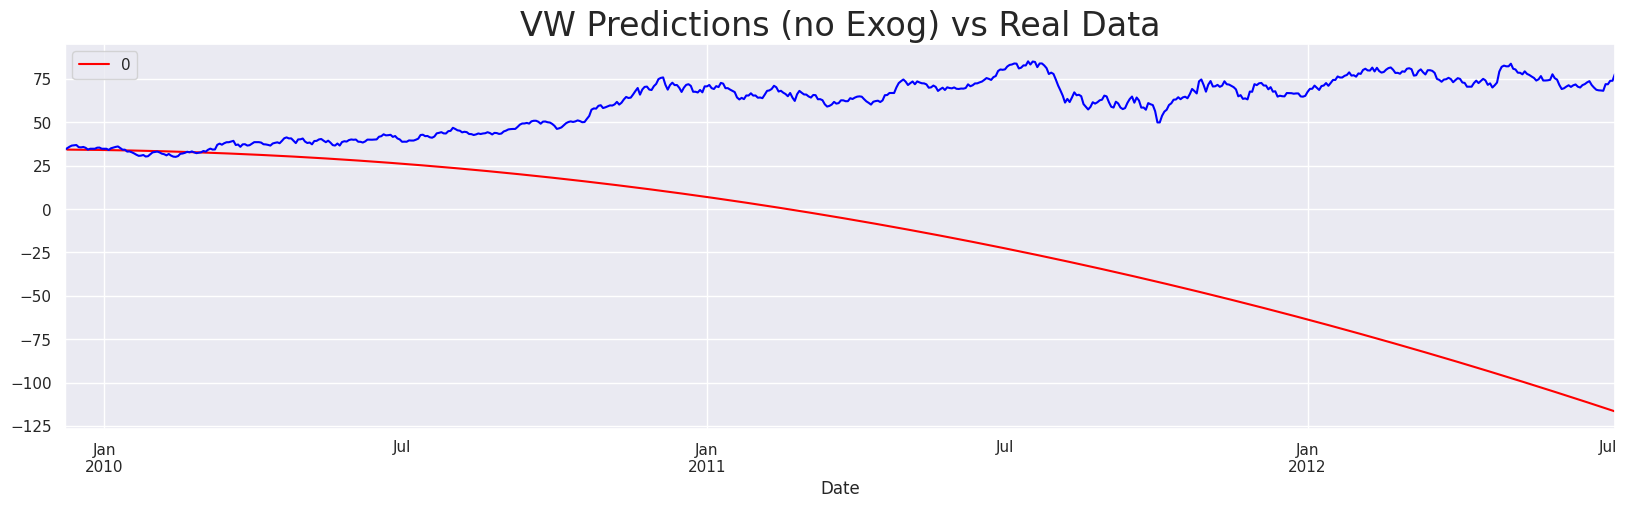

In [37]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen para el segundo período.
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

# Realiza predicciones utilizando el modelo ajustado para el segundo período.
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)

# Grafica las predicciones en rojo.
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# Grafica la serie de tiempo real en azul.
df.vol[ann_1:ann_2].plot(color = "blue")

# Agrega un título al gráfico.
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)

# Muestra el gráfico.
plt.show()


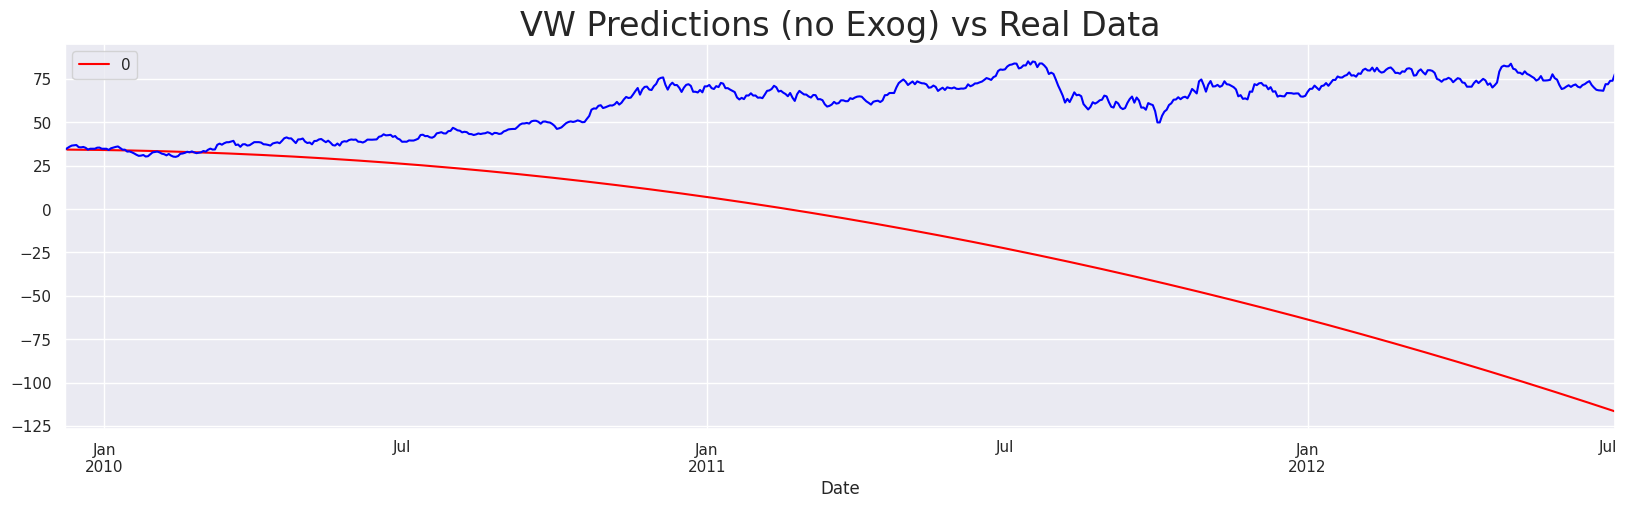

In [39]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen para el segundo período.
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

# Realiza predicciones utilizando el modelo ajustado para el segundo período.
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)

# Grafica las predicciones en rojo.
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# Grafica la serie de tiempo real en azul.
df.vol[ann_1:ann_2].plot(color = "blue")

# Agrega un título al gráfico.
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)

# Muestra el gráfico.
plt.show()


### For Volkswagen

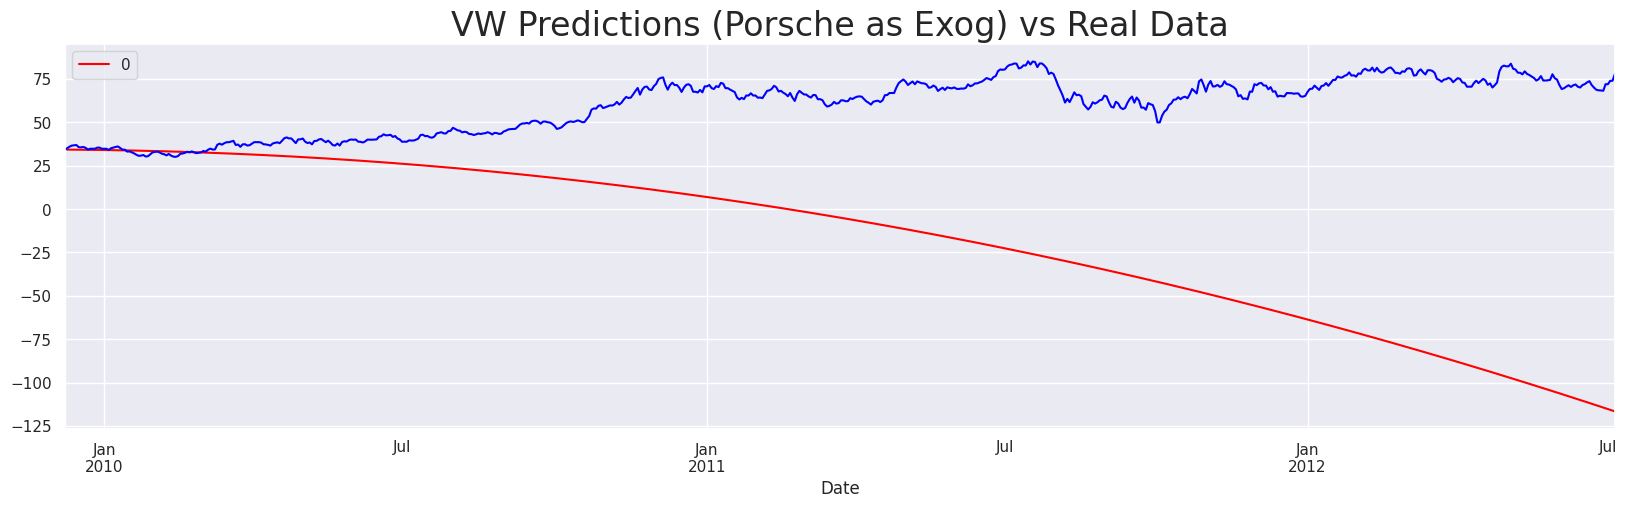

In [41]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen con Porsche como variable exógena para el segundo período.
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

# Realiza predicciones utilizando el modelo ajustado para el segundo período, incluyendo Porsche como variable exógena.
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)

# Grafica las predicciones en rojo.
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# Grafica la serie de tiempo real en azul.
df.vol[ann_1:ann_2].plot(color = "blue")

# Agrega un título al gráfico.
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)

# Muestra el gráfico.
plt.show()


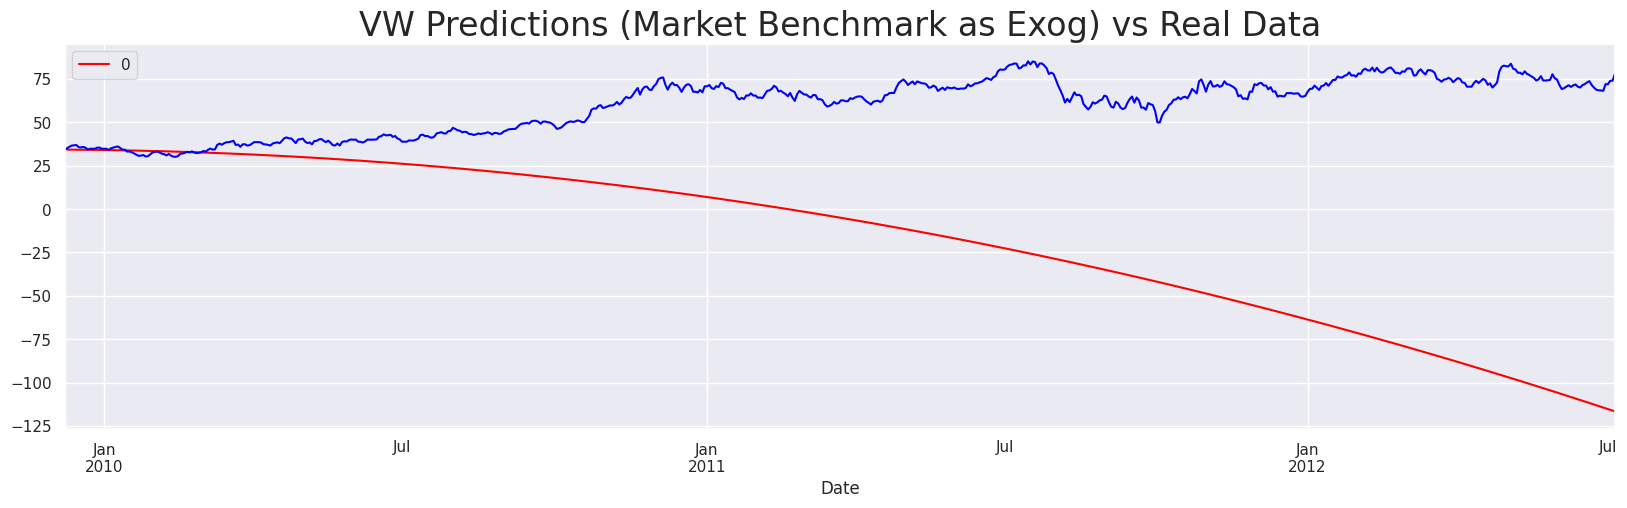

In [42]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen con BMW como variable exógena para el segundo período.
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

# Realiza predicciones utilizando el modelo ajustado para el segundo período, incluyendo BMW como variable exógena.
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)

# Grafica las predicciones en rojo.
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# Grafica la serie de tiempo real en azul.
df.vol[ann_1:ann_2].plot(color = "blue")

# Agrega un título al gráfico.
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)

# Muestra el gráfico.
plt.show()


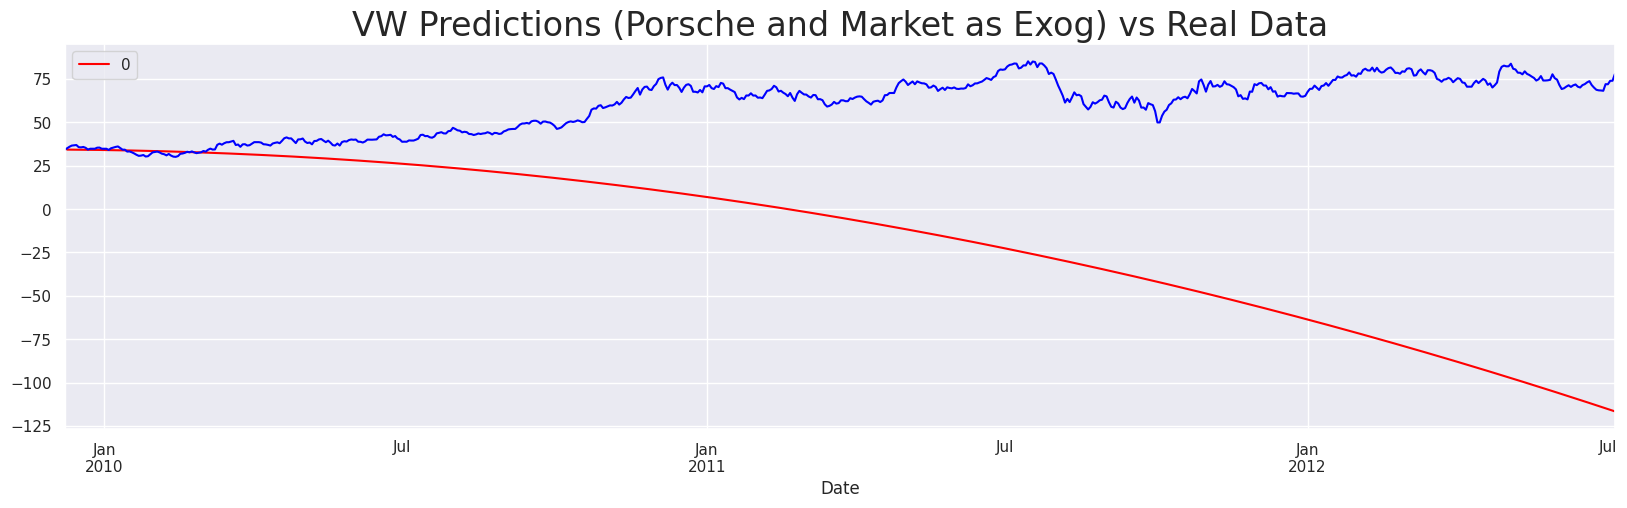

In [43]:
# Ajusta un modelo ARIMA automáticamente a la serie de tiempo de Volkswagen con Porsche y BMW como variables exógenas para el segundo período.
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

# Realiza predicciones utilizando el modelo ajustado para el segundo período, incluyendo Porsche y BMW como variables exógenas.
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por', 'bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)

# Grafica las predicciones en rojo.
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

# Grafica la serie de tiempo real en azul.
df.vol[ann_1:ann_2].plot(color = "blue")

# Agrega un título al gráfico.
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)

# Muestra el gráfico.
plt.show()


## Volatility

### Volatility of VW for Each Period

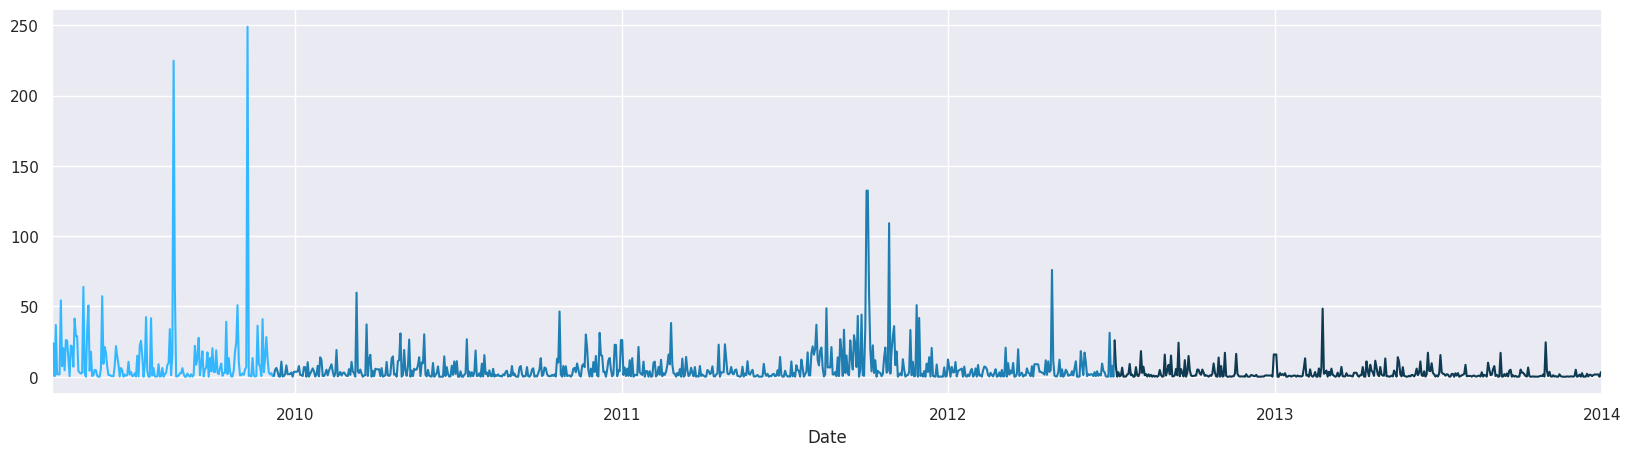

In [45]:
# Grafica la serie de tiempo al cuadrado de los precios de las acciones de Volkswagen para el primer período en azul claro.
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")

# Grafica la serie de tiempo al cuadrado de los precios de las acciones de Volkswagen para el segundo período en azul más oscuro.
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")

# Grafica la serie de tiempo al cuadrado de los precios de las acciones de Volkswagen para el tercer período en azul oscuro.
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")

# Muestra el gráfico.
plt.show()


### Volatility Trends for Each Period

In [48]:
# Ajusta un modelo GARCH al primer subperíodo de la serie de rendimiento de Volkswagen.
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)

# Estima los parámetros del modelo GARCH para el primer subperíodo.
results_garch_pre = model_garch_pre.fit(update_freq = 5)

# Ajusta un modelo GARCH al segundo subperíodo de la serie de rendimiento de Volkswagen.
model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)

# Estima los parámetros del modelo GARCH para el segundo subperíodo.
results_garch_btn = model_garch_btn.fit(update_freq = 5)

# Ajusta un modelo GARCH al tercer subperíodo de la serie de rendimiento de Volkswagen.
model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)

# Estima los parámetros del modelo GARCH para el tercer subperíodo.
results_garch_post = model_garch_post.fit(update_freq = 5)


Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7774994020922
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.00312915608964
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.9904744099903
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99047435769893
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7533399664098
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314087624466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7314087612012
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.5623337919878
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.557985274779
            Iterations: 7
            

In [49]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Sun, Oct 15 2023   Df Residuals:                      177
Time:                        03:04:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6196      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.194e-02      1.675  9.399e-02 [-2.623e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [50]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Sun, Oct 15 2023   Df Residuals:                      671
Time:                        03:04:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [51]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Sun, Oct 15 2023   Df Residuals:                      389
Time:                        03:04:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""